In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca302ed20fd07710bc3eb76eb5128389


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buraydah
Processing Record 2 of Set 1 | saint-prosper
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | nishihara
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | fallon
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | akdagmadeni
Processing Record 16 of Set 1 | paradwip
City not found. Skipping...
Processing Record 17 of Set 1 | oistins
Processing Record 18 of Set 1 | raga
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | punta arenas
Processing Record

Processing Record 38 of Set 4 | grenada
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | buala
Processing Record 41 of Set 4 | toguchin
Processing Record 42 of Set 4 | nenjiang
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | wenling
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | weatherford
Processing Record 47 of Set 4 | madaoua
Processing Record 48 of Set 4 | salalah
Processing Record 49 of Set 4 | fjerritslev
Processing Record 50 of Set 4 | keti bandar
Processing Record 1 of Set 5 | changde
Processing Record 2 of Set 5 | pascagoula
Processing Record 3 of Set 5 | jalor
Processing Record 4 of Set 5 | phan rang
City not found. Skipping...
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | mangrol
Processing Record 7 of Set 5 | russell
Processing Record 8 of Set 5 | maldonado
Processing Record 9 of Set 5 | vigrestad
Processing Record 10 of Set 5 | norman wells
Processing Record 11 of Set 5 |

Processing Record 29 of Set 8 | half moon bay
Processing Record 30 of Set 8 | maragogi
Processing Record 31 of Set 8 | ranong
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | diplo
Processing Record 34 of Set 8 | ishigaki
Processing Record 35 of Set 8 | saint-joseph
Processing Record 36 of Set 8 | talnakh
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | preobrazheniye
Processing Record 39 of Set 8 | helong
Processing Record 40 of Set 8 | tete
Processing Record 41 of Set 8 | sainte-marie
Processing Record 42 of Set 8 | necochea
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | tevriz
Processing Record 45 of Set 8 | kemise
Processing Record 46 of Set 8 | muli
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 8 | quatre cocos
Processing Record 50 of Set 8 | pevek
Processing Record 1 of Set 9 | lakatoro
Processing Record

Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | hamilton
Processing Record 21 of Set 12 | virginia beach
Processing Record 22 of Set 12 | vung tau
Processing Record 23 of Set 12 | valleyview
Processing Record 24 of Set 12 | bani
Processing Record 25 of Set 12 | luwuk
Processing Record 26 of Set 12 | tilichiki
Processing Record 27 of Set 12 | karaul
City not found. Skipping...
Processing Record 28 of Set 12 | shakawe
Processing Record 29 of Set 12 | sorvag
City not found. Skipping...
Processing Record 30 of Set 12 | kasongo-lunda
Processing Record 31 of Set 12 | iisalmi
Processing Record 32 of Set 12 | azovo
Processing Record 33 of Set 12 | belton
Processing Record 34 of Set 12 | springbok
Processing Record 35 of Set 12 | bang saphan
Processing Record 36 of Set 12 | pathein
Processing Record 37 of Set 12 | cilegon
Processing Record 38 of Set 12 | maceio
Processing Record 39 of Set 12 | bykovo
Processing Record 40 of Set 12 | kawalu
Processing Record 41 of Set 12

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buraydah,26.3260,43.9750,75.61,20,0,5.61,SA,2022-10-11 21:14:28
1,Saint-Prosper,46.2117,-70.4811,53.89,66,22,9.19,CA,2022-10-11 21:15:53
2,Cape Town,-33.9258,18.4232,64.09,86,20,11.50,ZA,2022-10-11 21:15:53
3,Nishihara,26.1842,127.7558,74.48,60,75,16.11,JP,2022-10-11 21:15:53
4,Jamestown,42.0970,-79.2353,68.52,34,75,10.36,US,2022-10-11 21:15:30
5,Yellowknife,62.4560,-114.3525,34.83,85,100,26.19,CA,2022-10-11 21:14:38
6,Atuona,-9.8000,-139.0333,77.41,73,43,15.01,PF,2022-10-11 21:15:55
7,Albany,42.6001,-73.9662,66.88,63,3,1.01,US,2022-10-11 21:15:37
8,Fallon,39.4735,-118.7774,81.91,14,75,3.44,US,2022-10-11 21:15:56
9,Butaritari,3.0707,172.7902,82.13,78,30,20.11,KI,2022-10-11 21:15:56


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

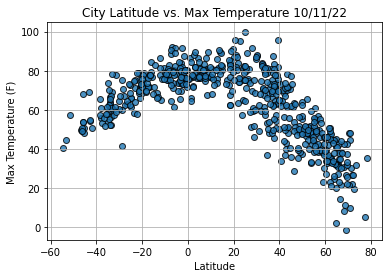

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

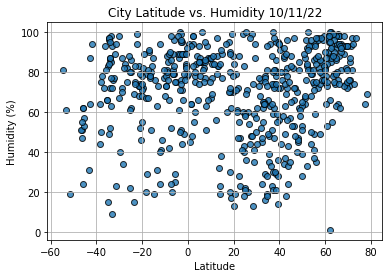

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

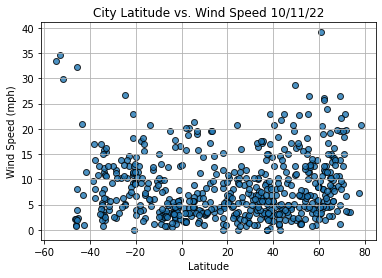

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()